In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

import scripts_logic

In [2]:
data = pd.read_json("../data/cocktail_dataset.json")
data.set_index('id', inplace=True)
data.head()

,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
id,,,,,,,,,,
11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00,"[{'id': 170, 'name': 'Soda water', 'descriptio..."
11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 513, 'name': 'Water', 'description': '..."
11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 482, 'name': 'Sweet Vermouth', 'descri..."
11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:59.000+00:00,2024-08-18T19:06:18.000+00:00,"[{'id': 409, 'name': 'Powdered Sugar', 'descri..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 11000 to 11993
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          134 non-null    object
 1   category      134 non-null    object
 2   glass         134 non-null    object
 3   tags          35 non-null     object
 4   instructions  134 non-null    object
 5   imageUrl      134 non-null    object
 6   alcoholic     134 non-null    int64 
 7   createdAt     134 non-null    object
 8   updatedAt     134 non-null    object
 9   ingredients   134 non-null    object
dtypes: int64(1), object(9)
memory usage: 11.5+ KB


In [4]:
data.shape

(134, 10)

In [5]:
print(f"Liczba wierszy: {len(data)}")
print(data.describe())

Liczba wierszy: 134
       alcoholic
count      134.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0


wszystkie drinki okazują się być z alkoholem

In [6]:
# puste wartości
data.isnull().sum()

name             0
category         0
glass            0
tags            99
instructions     0
imageUrl         0
alcoholic        0
createdAt        0
updatedAt        0
ingredients      0
dtype: int64

puste wartości występują w kolumnie tags

In [7]:
scripts_logic.show_tags(data)

['IBA', 'ContemporaryClassic', 'Alcoholic', 'USA', 'Asia', 'Vegan', 'Citrus', 'Brunch', 'Hangover', 'Mild', 'IBA', 'Classic', 'Alcoholic', 'Expensive', 'Savory', 'Strong', 'Asia', 'StrongFlavor', 'Brunch', 'Vegetarian', 'Sour', 'IBA', 'Classic', 'IBA', 'Classic', 'Alcoholic', 'ContemporaryClassic', 'IBA', 'Classic', 'Christmas', 'Alcoholic', 'IBA', 'Classic', 'Beach', 'IBA', 'ContemporaryClassic', 'IBA', 'Classic', 'Alcoholic', 'IBA', 'ContemporaryClassic', 'DinnerParty', 'Summer', 'Beach', 'Chilli', 'IBA', 'Classic', 'Dairy', 'Nutty', 'Dairy', 'Alcoholic', 'IBA', 'Classic', 'Cold', 'Fruity', 'IBA', 'ContemporaryClassic', 'Breakfast', 'Brunch', 'Hangover', 'IBA', 'ContemporaryClassic', 'ContemporaryClassic', 'IBA', 'IBA', 'ContemporaryClassic', 'IBA', 'ContemporaryClassic', 'IBA', 'Classic', 'Citrus', 'StrongFlavor', 'Sour', 'IBA', 'ContemporaryClassic', 'IBA', 'ContemporaryClassic', 'IBA', 'ContemporaryClassic', 'Beach', 'IBA', 'IBA', 'NewEra', 'IBA', 'ContemporaryClassic']


większość tagów opisuje Smaki, Zawartość alkoholu, Region lub Porę picia, dodatkowo występuje tag: IBA, mówiący o weryfikacji przez International Bartenders Association, można wnioskokwać, że drinki bez tagów nie otrzymały tej certyfikacji.

[potencjalna anomalia]

Nie jest to jednak oczywiste, ponieważ możliwe, że tagi zostały usunięte i brak tagu IBA nie oznacza braku certyfikacji.
W celu weryfikacji tej hipotezy porównam nazwy drinków z kolumy data.name z tymi z oficjalnej strony IBA.

In [8]:
scripts_logic.analyze_IBA(data)

Drinki usunięte z IBA: Godfather
Drinki usunięte z IBA: Godmother
Drinki usunięte z IBA: Harvey Wallbanger
Drinki usunięte z IBA: Kamikaze
Drinki usunięte z IBA: Mai Tai
Anomalie:  0


Teraz jest pewność, że brak tagu IBA nie jest anomalią. Dodatkowo, został odkryty fakt, że IBA z czasem usuwa ze swoich list niektóre drinki. Na przykład Godfather, usunięty w 2020 roku.

Następnie sprawdzam czy nie ma duplikatów wśród drinków.

In [9]:
duplicates = data[data.duplicated(subset=['name'], keep=False)]
duplicates

,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
id,,,,,,,,,,


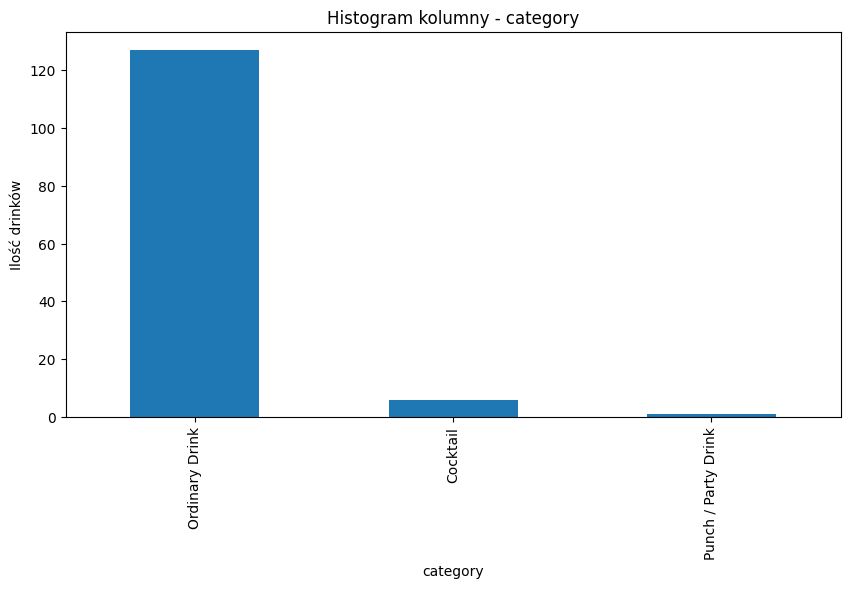

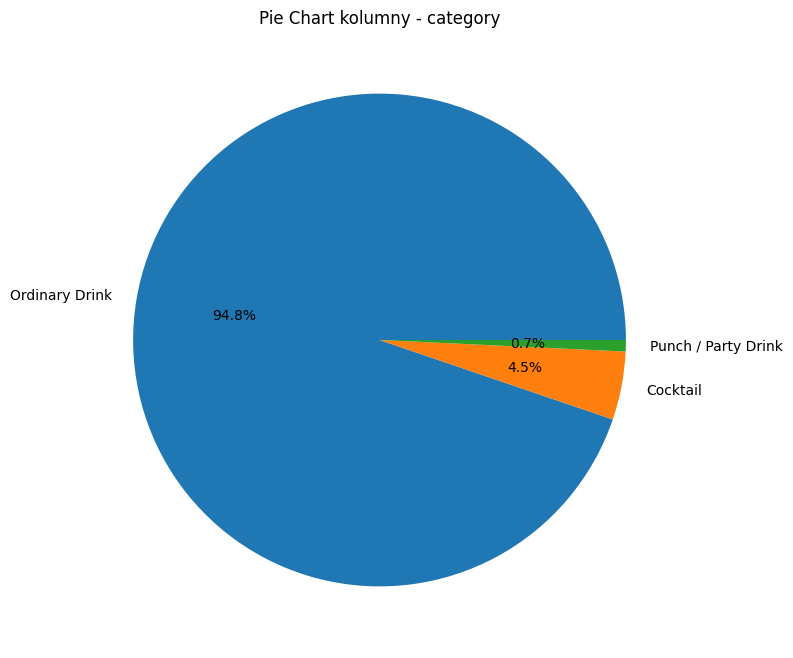

category
Ordinary Drink         127
Cocktail                 6
Punch / Party Drink      1
Name: count, dtype: int64


In [10]:
scripts_logic.generate_hist_and_pie(data, "category")

Znaczna część drinków bo aż 127 z 134 należy do kategorii Ordinary Drink

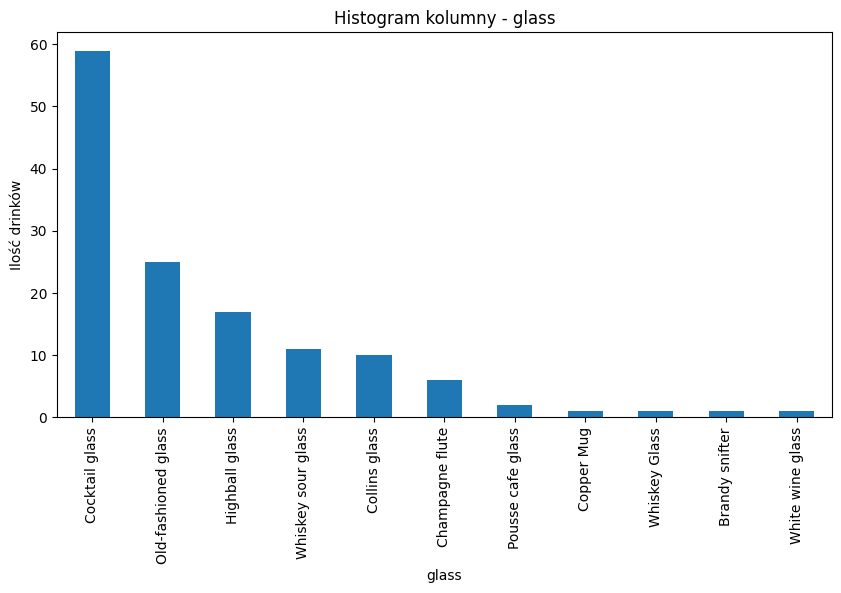

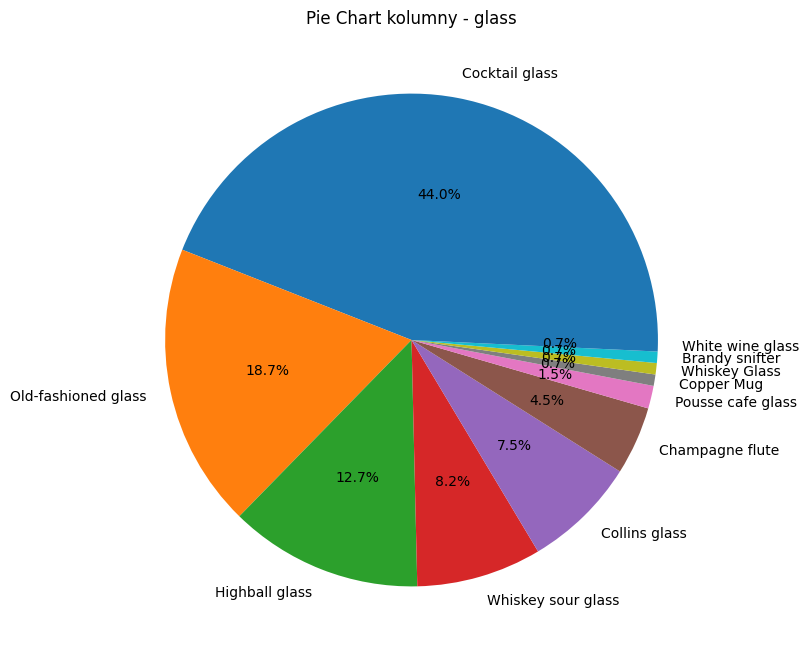

glass
Cocktail glass         59
Old-fashioned glass    25
Highball glass         17
Whiskey sour glass     11
Collins glass          10
Champagne flute         6
Pousse cafe glass       2
Copper Mug              1
Whiskey Glass           1
Brandy snifter          1
White wine glass        1
Name: count, dtype: int64


In [11]:
scripts_logic.generate_hist_and_pie(data, "glass")

W kolumnie glass dominuje Cocktail glass stanowiąc 59 z 134.

Ciekawą obserwacją jest to, że pomimo tego żę Cocktaile stanowią 0.5% drinków to Cocktail glass stanowi blisko 50% kategorii glass.

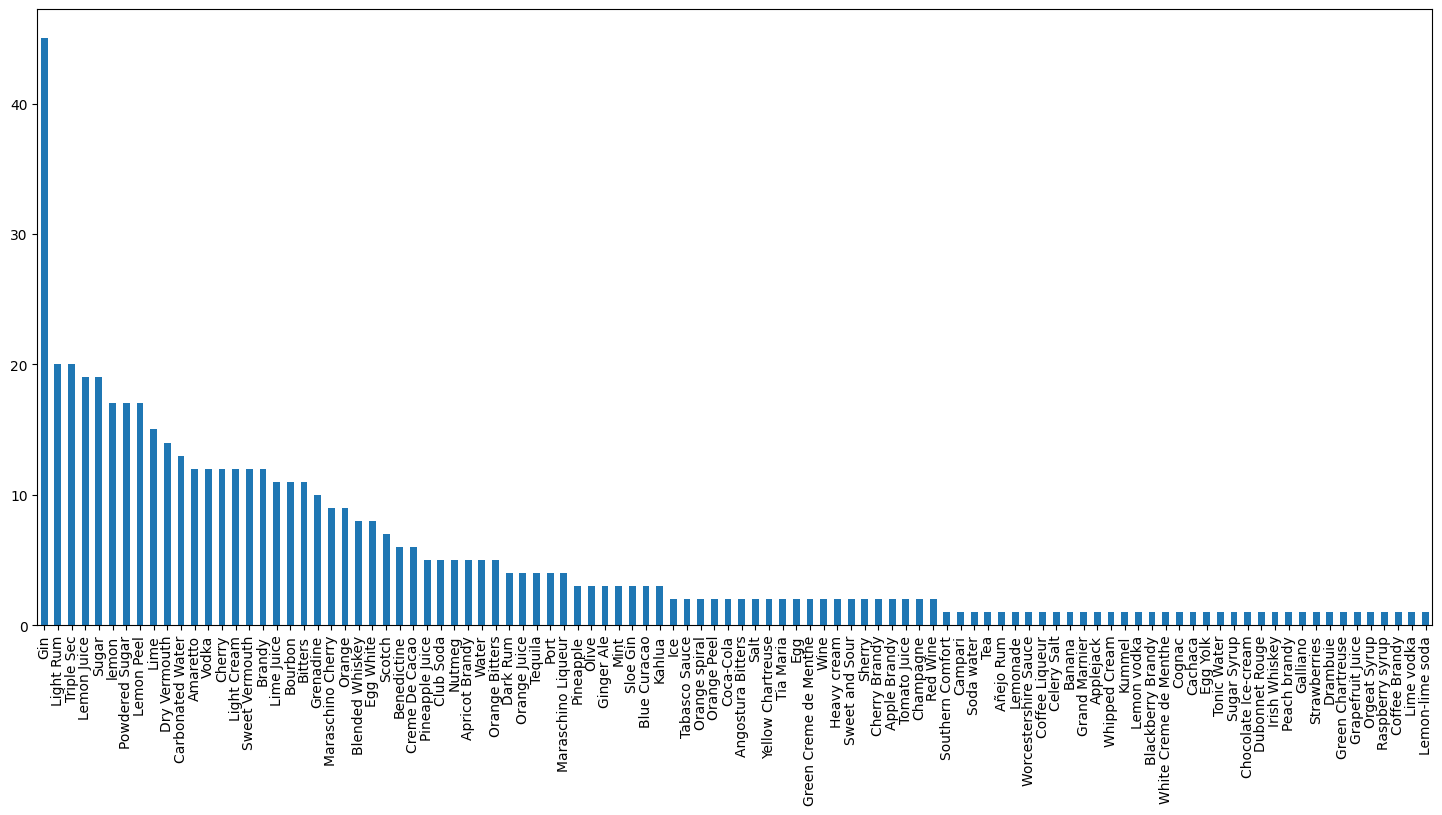

Gin                45
Light Rum          20
Triple Sec         20
Lemon Juice        19
Sugar              19
                   ..
Orgeat Syrup        1
Raspberry syrup     1
Coffee Brandy       1
Lime vodka          1
Lemon-lime soda     1
Name: count, Length: 102, dtype: int64


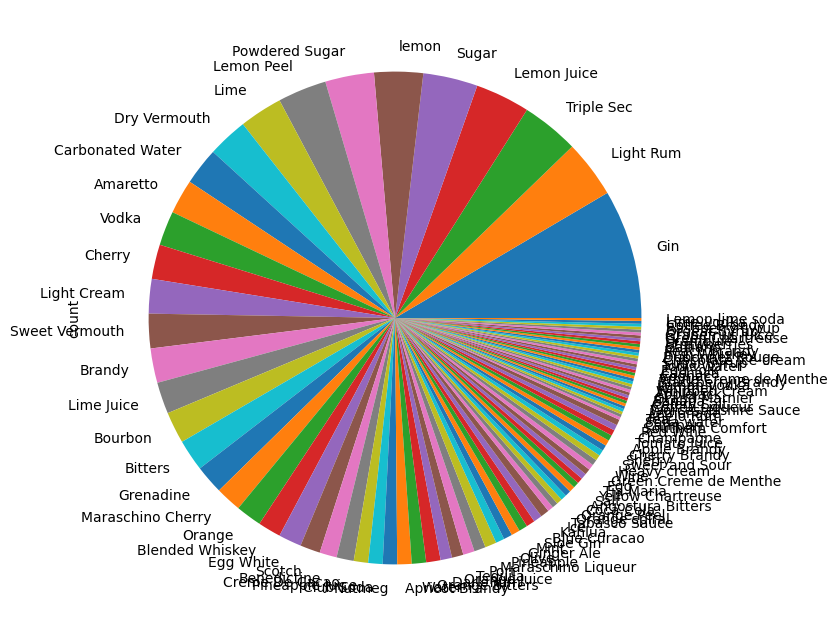

In [12]:
scripts_logic.list_to_hist_and_pie(data, "ingredients")

Najczęściej używanym składnikiem jest gin.

Kolejną obserwacją jest wykorzystywanie różnych części limonki i cytryny. Po zsumowaniu ich integralnych części mogłoby się okazać, że cytrusy są numerem 1.

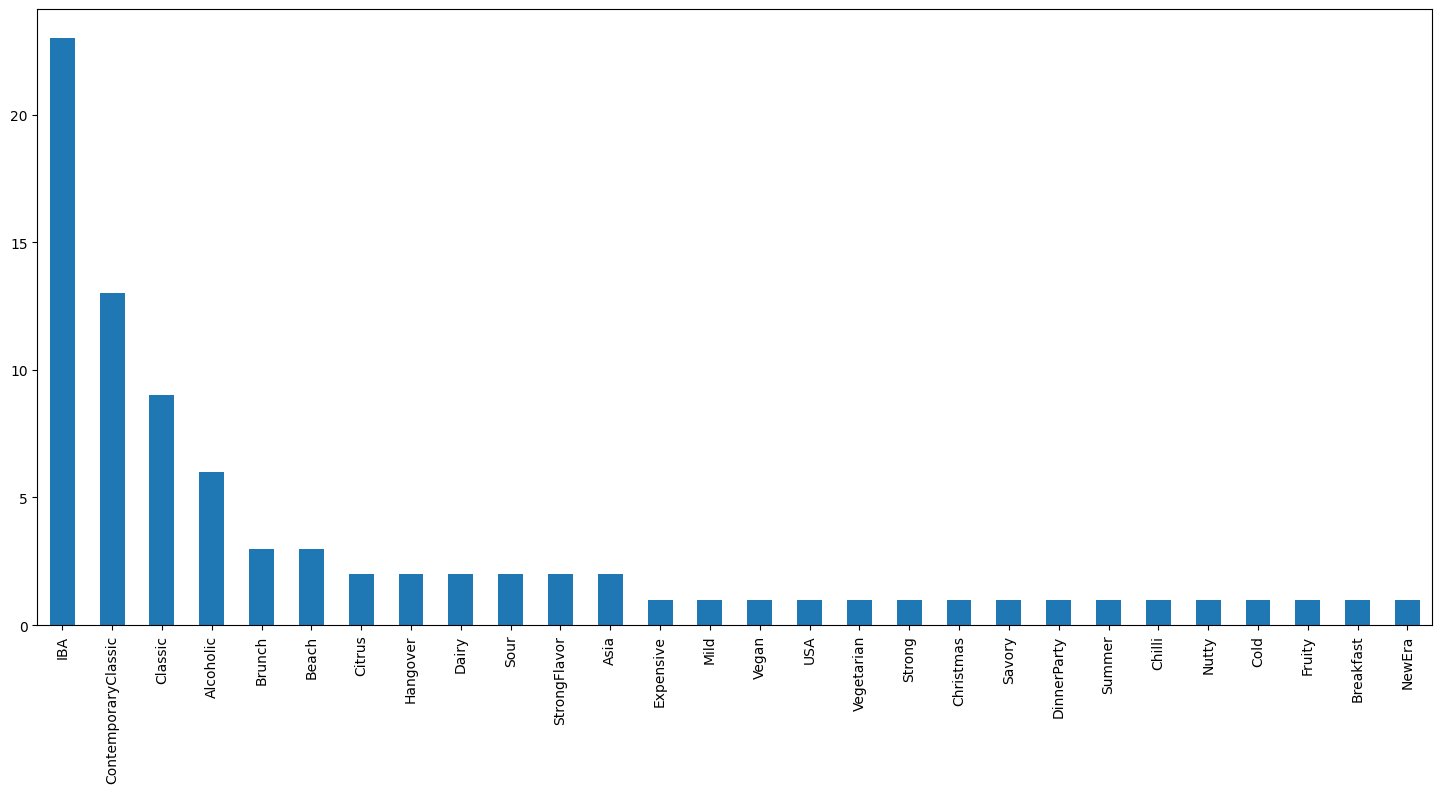

IBA                    23
ContemporaryClassic    13
Classic                 9
Alcoholic               6
Brunch                  3
Beach                   3
Citrus                  2
Hangover                2
Dairy                   2
Sour                    2
StrongFlavor            2
Asia                    2
Expensive               1
Mild                    1
Vegan                   1
USA                     1
Vegetarian              1
Strong                  1
Christmas               1
Savory                  1
DinnerParty             1
Summer                  1
Chilli                  1
Nutty                   1
Cold                    1
Fruity                  1
Breakfast               1
NewEra                  1
Name: count, dtype: int64


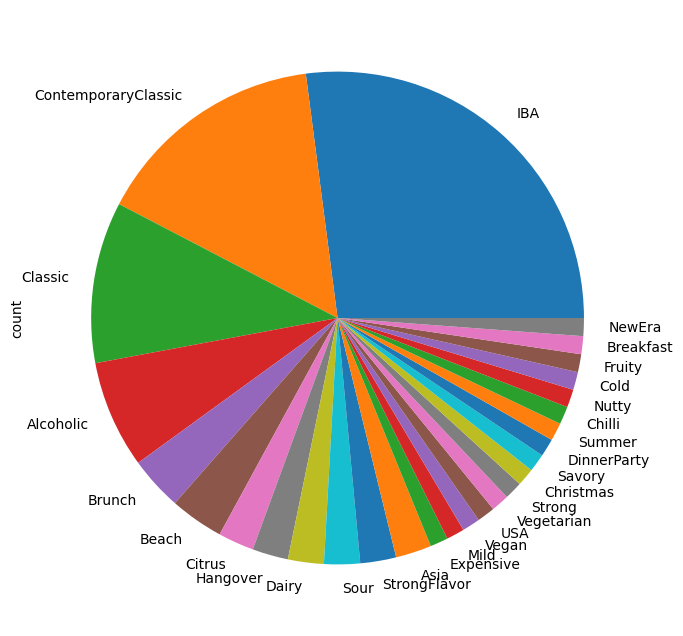

In [13]:
scripts_logic.list_to_hist_and_pie(data, "tags")

Najczęstszym tagiem jest IBA, może to wynikać z tego, że są to certyfikowane a co za tym idzie bardziej dokumentowane drinki, więc większość drinków posiadających tak, posiada tag IBA.

Zweryfikuję to sprawdzająć ile drinków z tagami posiada tag IBA a ile ma tagi ale nie ma IBA.

Drinków z tagami: 35
Drinków z tagiem IBA: 23
Drinków z tagami ale bez IBA: 12


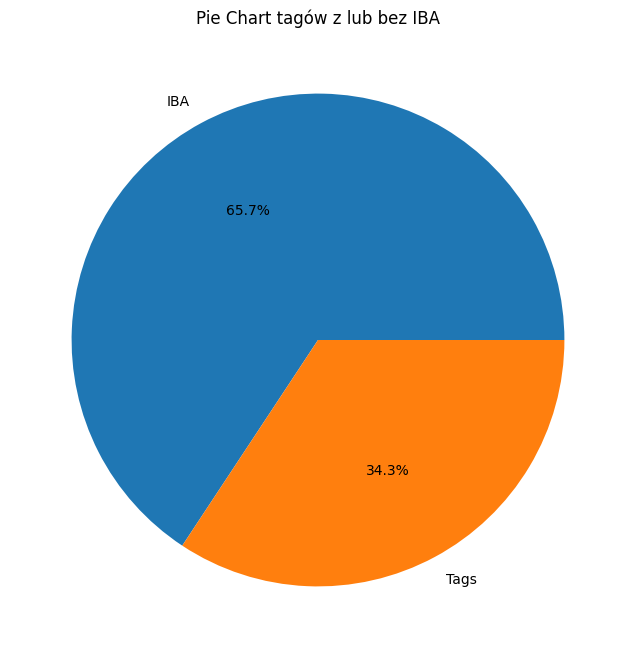

In [14]:
# Zweryfikuję to sprawdzająć ile drinków z tagami posiada tag IBA a ile ma tagi ale nie ma IBA.
scripts_logic.tags_contain_IBA(data)

Teoria ta w pewnym stopniu się sprawdza, 2/3 otagowanych drinków pochodzi z bazy IBA.

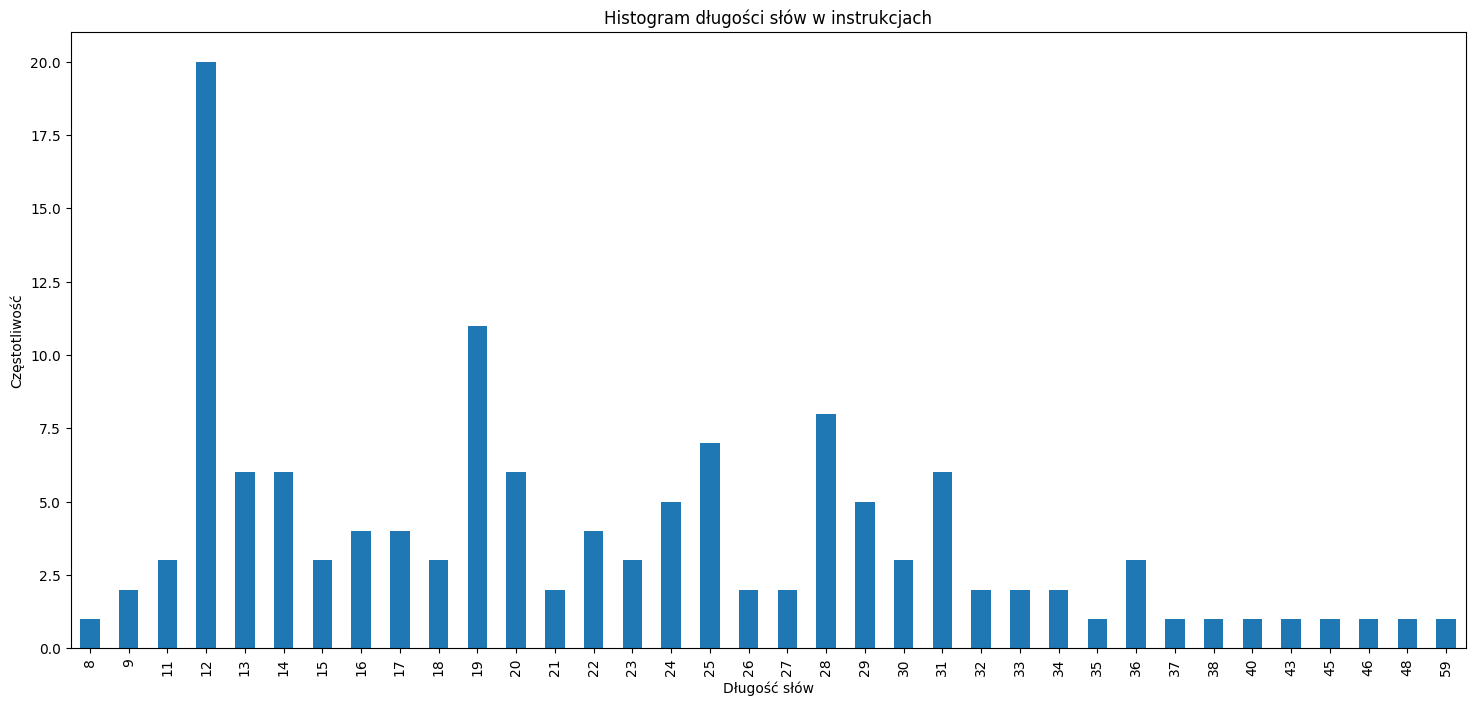

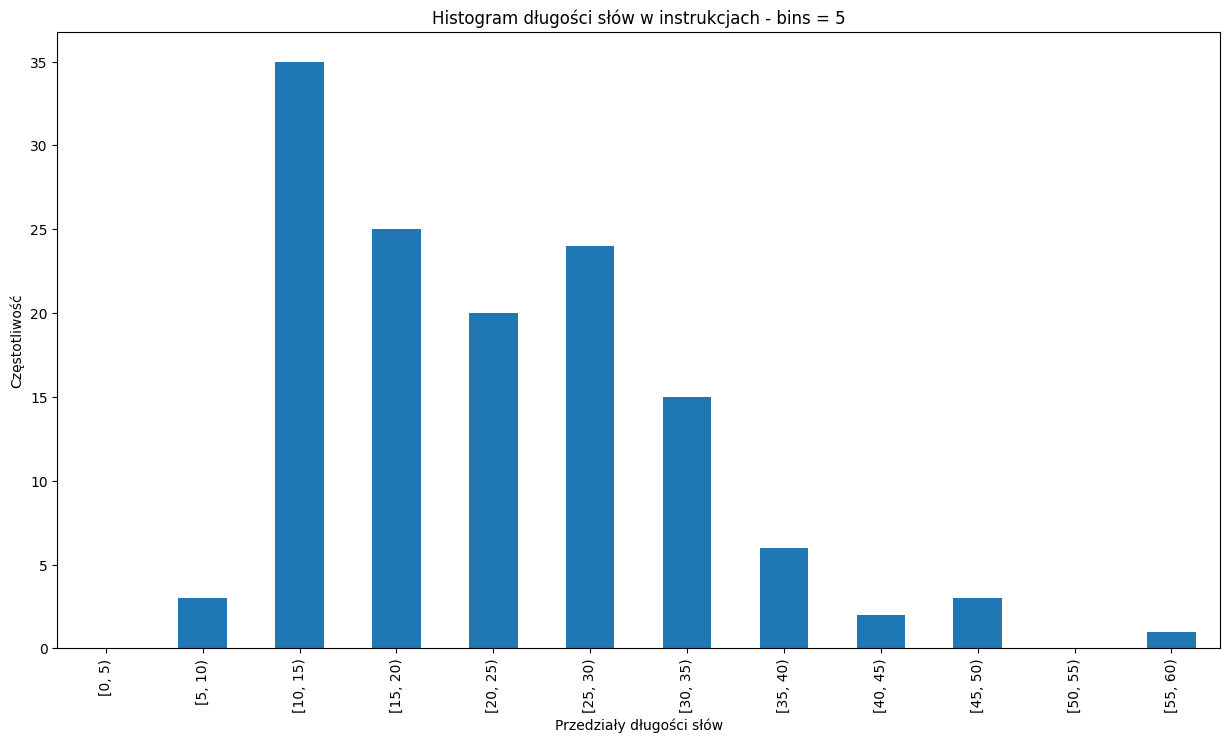

[0, 5)       0
[5, 10)      3
[10, 15)    35
[15, 20)    25
[20, 25)    20
[25, 30)    24
[30, 35)    15
[35, 40)     6
[40, 45)     2
[45, 50)     3
[50, 55)     0
[55, 60)     1
Name: count, dtype: int64


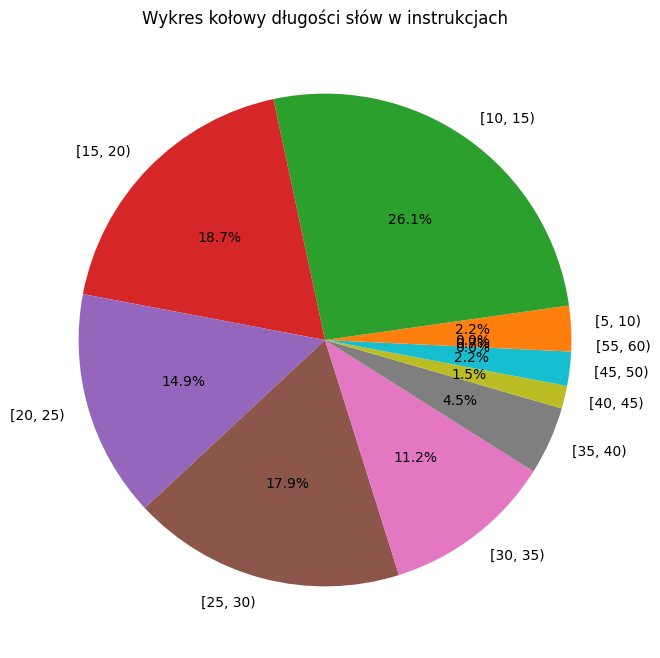

In [15]:
# histogram kolumny - długość słów w instructions
scripts_logic.analyze_instructions(data)

Najwięcej jest instrukcji 12 - słownych.

Drinków, których składniki znajdują się w nazwie: 34
Drinków, których składniki nie znajdują się w nazwie: 100


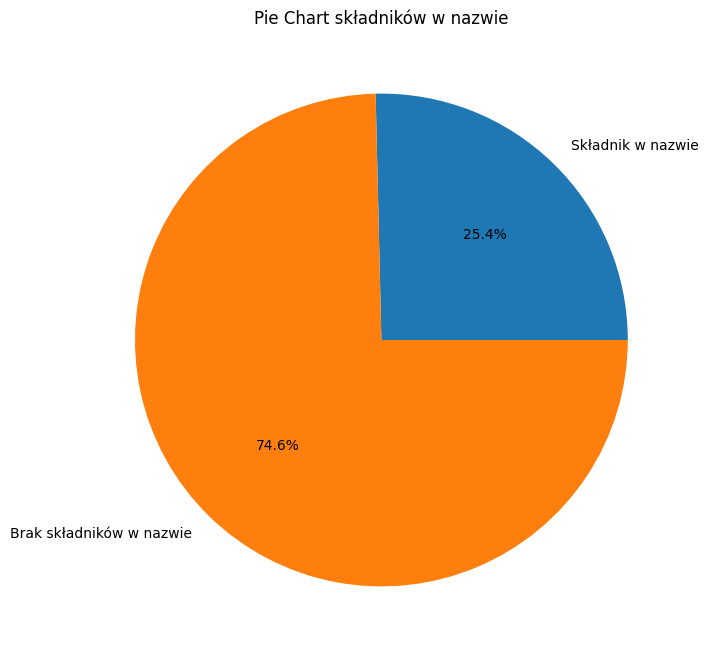

In [16]:
scripts_logic.drinks_with_ingredient_in_name(data)

Badam daty i sprawdzam czy się do czegoś przydadzą

In [17]:
data.updatedAt = pd.to_datetime(data.updatedAt)
data.createdAt = pd.to_datetime(data.createdAt)

print(sum(data.createdAt == data.updatedAt))
data[data.createdAt != data.updatedAt]

129


,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
id,,,,,,,,,,
11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18 19:01:17+00:00,2024-08-18 19:06:16+00:00,"[{'id': 170, 'name': 'Soda water', 'descriptio..."
11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18 19:01:58+00:00,2024-08-18 19:06:17+00:00,"[{'id': 513, 'name': 'Water', 'description': '..."
11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18 19:01:58+00:00,2024-08-18 19:06:17+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18 19:01:58+00:00,2024-08-18 19:06:17+00:00,"[{'id': 482, 'name': 'Sweet Vermouth', 'descri..."
11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18 19:01:59+00:00,2024-08-18 19:06:18+00:00,"[{'id': 409, 'name': 'Powdered Sugar', 'descri..."


<Axes: xlabel='createdAt', ylabel='updatedAt'>

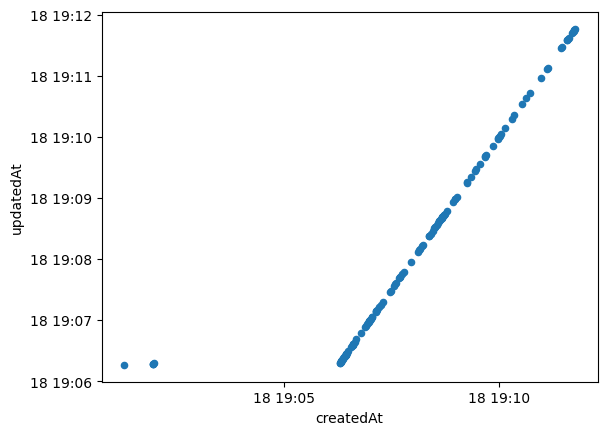

In [18]:
data.plot(kind='scatter',
          x='createdAt',
          y='updatedAt',)

Sprawdzam składniki

In [19]:
data.ingredients.iloc[110]


[{'id': 2,
  'name': 'Gin',
  'description': 'Gin is a distilled alcoholic drink that derives its predominant flavour from juniper berries (Juniperus communis). Gin is one of the broadest categories of spirits, all of various origins, styles, and flavour profiles, that revolve around juniper as a common ingredient.\r\n\r\nFrom its earliest origins in the Middle Ages, the drink has evolved from a herbal medicine to an object of commerce in the spirits industry. Gin emerged in England after the introduction of the jenever, a Dutch liquor which originally had been a medicine. Although this development had been taking place since early 17th century, gin became widespread after the William of Orange-led 1688 Glorious Revolution and subsequent import restrictions on French brandy.\r\n\r\nGin today is produced in subtly different ways, from a wide range of herbal ingredients, giving rise to a number of distinct styles and brands. After juniper, gin tends to be flavoured with botanical/herbal,

Wśród składników zdarzają się często niewypełnione dane takie jak 'percentage' w składnikach z 'alcohol': 1

In [20]:
data.columns

Index(['name', 'category', 'glass', 'tags', 'instructions', 'imageUrl',
       'alcoholic', 'createdAt', 'updatedAt', 'ingredients'],
      dtype='object')

<Axes: xlabel='category', ylabel='glass'>

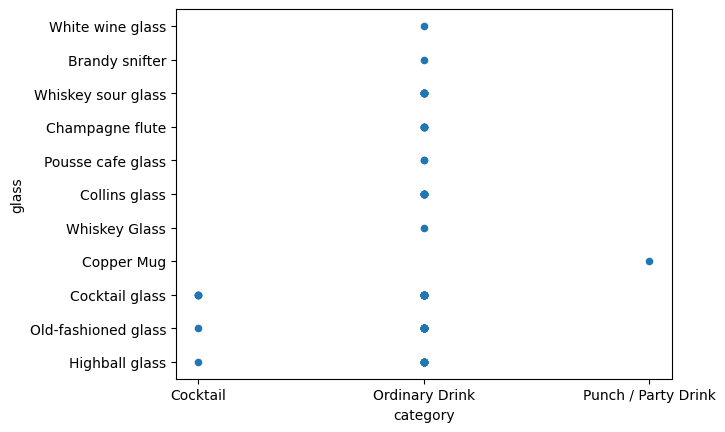

In [21]:
data.plot(kind='scatter',
          x='category',
          y='glass',)

Dane w aktulanej formie kategorycznej nie dostarczają zbyt wiele przydatnych informacji, ciężko jest przeprowadzić analizę korelacji między kolumnami. Dlatego teraz zajmę się preprocessingiem i dodaniem nowych cech żeby potem przeprowadzić głębszą analizę na obrobionych danych.

Kontynuacja w notatniku: 3_Preprocessing.ipynb


Dodatkowo przeprowadziłem analizę samych składników: 2_IngredientsEDA.ipynb